In [1]:
import yfinance as yf
# BTC-USD
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)
stock = "BTC-USD"
bit_coin_data = yf.download(stock, start, end)
bit_coin_data.head()


*********************100%%**********************]  1 of 1 completed

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-02-10,220.281998,221.807007,215.332001,219.839005,219.839005,21115100
2015-02-11,219.731995,223.406006,218.074005,219.184998,219.184998,17201900
2015-02-12,219.207993,222.199005,217.613998,221.764008,221.764008,15206200
2015-02-13,221.968994,240.259003,221.261993,235.427002,235.427002,42744400
2015-02-14,235.528000,259.808014,235.528000,257.321014,257.321014,49732500


In [3]:
bit_coin_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3.653000e+03
mean,21205.494880,21680.539059,20711.003052,21230.659395,21230.659395,1.971076e+10
std,23559.036150,24070.306461,23033.979338,23587.949869,23587.949869,2.077417e+10
min,210.067993,221.807007,199.567001,210.494995,210.494995,1.060090e+07
25%,3257.610107,3422.760010,3206.542236,3313.677246,3313.677246,1.517710e+09
50%,9937.070312,10210.052734,9716.656250,10005.000000,10005.000000,1.610444e+10
75%,34500.078125,35284.343750,33424.859375,34502.820312,34502.820312,3.076755e+10
max,106147.296875,109114.882812,105291.734375,106146.265625,106146.265625,3.509679e+11


In [4]:
bit_coin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2015-02-10 to 2025-02-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3653 non-null   float64
 1   High       3653 non-null   float64
 2   Low        3653 non-null   float64
 3   Close      3653 non-null   float64
 4   Adj Close  3653 non-null   float64
 5   Volume     3653 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 199.8 KB


In [5]:
bit_coin_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
Closing_price = bit_coin_data[['Close']]
Closing_price

,Close
Date,
2015-02-10,219.839005
2015-02-11,219.184998
2015-02-12,221.764008
2015-02-13,235.427002
2015-02-14,257.321014
...,...
2025-02-05,96615.445312
2025-02-06,96593.296875
2025-02-07,96529.085938


Text(0.5, 1.0, 'Close price of Bit Coin')

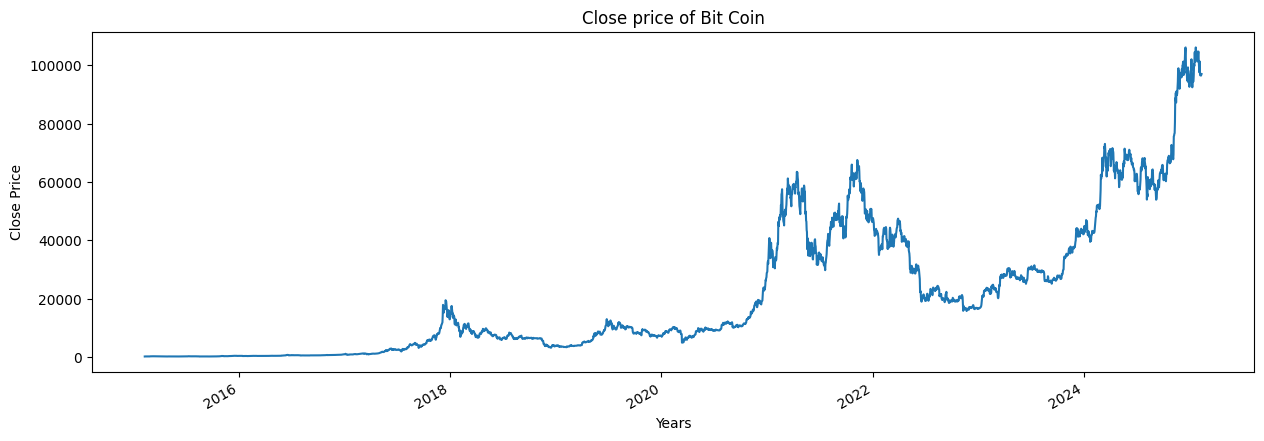

In [7]:
plt.figure(figsize=(15,5))
Closing_price['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [8]:
# Assuming you have a list of values
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Calculate the 5-day moving average
ma5 = []
for i in range(len(data)):
    if i < 4:
        ma5.append(None)  # Or any other appropriate placeholder
    else:
        window = data[i-4:i+1]
        average = sum(window) / len(window)
        ma5.append(average)

print(ma5)


[None, None, None, None, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


In [9]:
(2+3+4+5+6)//5

4

In [10]:
for i in range(2014,2024):
    print(list(Closing_price.index.year).count(i))

0
325
366
365
365
365
366
365
365
365


In [11]:
Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()
Closing_price['MA_for_365_days'].head()

C:\Users\hp\AppData\Local\Temp\ipykernel_23072\686540890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()


Date
2015-02-10   NaN
2015-02-11   NaN
2015-02-12   NaN
2015-02-13   NaN
2015-02-14   NaN
Name: MA_for_365_days, dtype: float64

In [12]:
Closing_price['MA_for_365_days'][0:365].tail()

Date
2016-02-05           NaN
2016-02-06           NaN
2016-02-07           NaN
2016-02-08           NaN
2016-02-09    289.960666
Name: MA_for_365_days, dtype: float64

Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

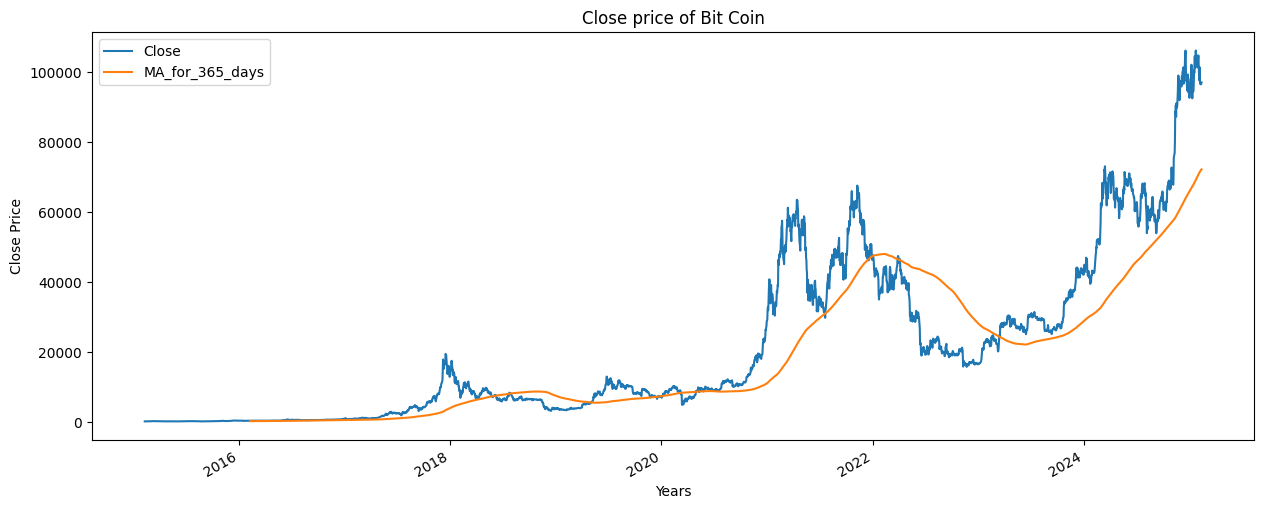

In [13]:
plt.figure()
Closing_price[['Close','MA_for_365_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

C:\Users\hp\AppData\Local\Temp\ipykernel_23072\1013624105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

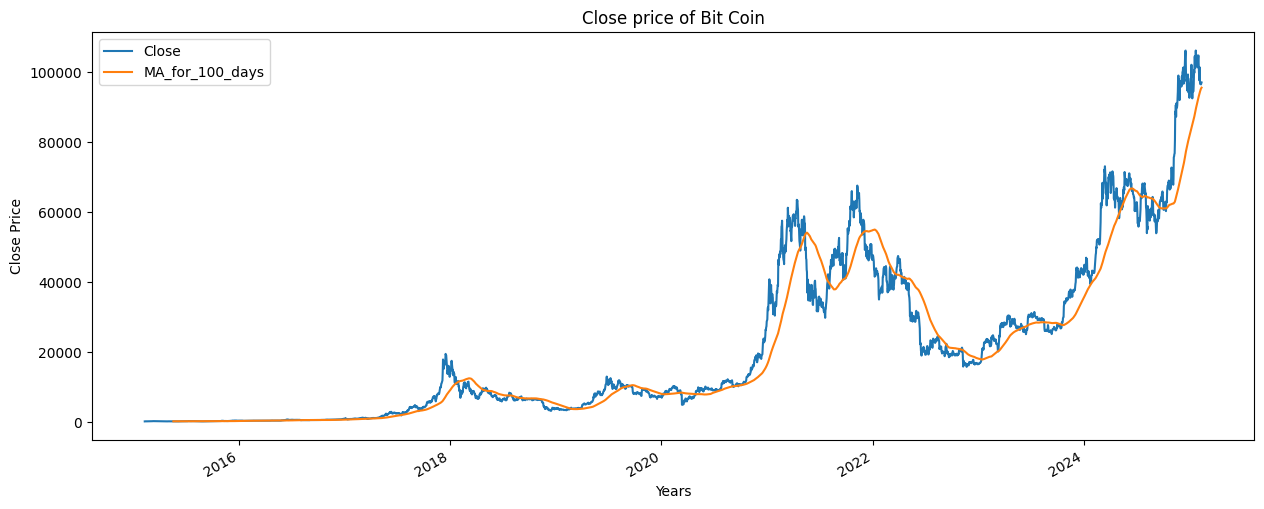

In [14]:
Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()
Closing_price['MA_for_100_days'].head()
plt.figure()
Closing_price[['Close','MA_for_100_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [15]:
# 1 to 100 ==> 101 day
# 2 to 101 (100 days) ==> 102 day
# 3 to 102 (100 days) ==> 103rd day future days close price using our model

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Closing_price[['Close']].values)
scaled_data

array([[8.82044785e-05],
       [8.20308607e-05],
       [1.06375895e-04],
       ...,
       [9.09216881e-01],
       [9.08776682e-01],
       [9.13952651e-01]])

In [17]:
scaled_data.shape

(3653, 1)

In [18]:
x_data = []
y_data = []

base_days = 100

for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [19]:
x_data[0], y_data[0]

(array([[8.82044785e-05],
        [8.20308607e-05],
        [1.06375895e-04],
        [2.35350219e-04],
        [4.42022737e-04],
        [2.29667483e-04],
        [2.20397766e-04],
        [3.12595125e-04],
        [2.43836513e-04],
        [2.81189342e-04],
        [3.14190491e-04],
        [3.21317354e-04],
        [2.40542073e-04],
        [2.68058683e-04],
        [2.66576675e-04],
        [2.54635483e-04],
        [2.44780395e-04],
        [4.09049819e-04],
        [4.13156058e-04],
        [4.69218286e-04],
        [6.15231455e-04],
        [6.72171452e-04],
        [5.90895927e-04],
        [6.20026772e-04],
        [5.87412509e-04],
        [6.20810051e-04],
        [6.02808744e-04],
        [7.46792127e-04],
        [7.67115906e-04],
        [8.10717685e-04],
        [7.91602386e-04],
        [7.06484788e-04],
        [6.73899045e-04],
        [7.16453090e-04],
        [7.56099582e-04],
        [7.08070648e-04],
        [4.32375352e-04],
        [4.76071620e-04],
        [4.8

In [20]:
len_train = int(len(x_data)*0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]


In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3197, 100, 1)
(3197, 1)
(356, 100, 1)
(356, 1)


In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))

model.add(LSTM(64, return_sequences = False))

model.add(Dense(25))

model.add(Dense(1))

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.fit(x_train, y_train, batch_size = 5, epochs=10)

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - loss: 0.0016
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - loss: 2.5284e-04
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - loss: 1.5409e-04
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 2.1205e-04
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - loss: 1.1297e-04
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - loss: 9.8738e-05
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 9.3058e-05
Epoch 8/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 36s 56ms/step - loss: 9.8275e-05
Epoch 9/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 9.9490e-05
Epoch 10/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - loss: 9.7683e-05


In [26]:
predictions = model.predict(x_test)
predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step 


array([[0.5125664 ],
       [0.51741904],
       [0.5128037 ],
       [0.5075919 ],
       [0.50178564],
       [0.5098909 ],
       [0.51155514],
       [0.5396801 ],
       [0.5657926 ],
       [0.62194604],
       [0.60723406],
       [0.6217831 ],
       [0.61544997],
       [0.6269744 ],
       [0.6797248 ],
       [0.6275831 ],
       [0.65642434],
       [0.66081405],
       [0.6753927 ],
       [0.6760736 ],
       [0.6816462 ],
       [0.71439594],
       [0.7041069 ],
       [0.723185  ],
       [0.70198137],
       [0.6827058 ],
       [0.6397983 ],
       [0.6754157 ],
       [0.6624629 ],
       [0.6055563 ],
       [0.6730458 ],
       [0.64173514],
       [0.62872064],
       [0.6321873 ],
       [0.6655467 ],
       [0.69297194],
       [0.6921966 ],
       [0.68720704],
       [0.7011338 ],
       [0.6897909 ],
       [0.6879697 ],
       [0.7054847 ],
       [0.6855932 ],
       [0.6421709 ],
       [0.65073806],
       [0.6757021 ],
       [0.6671774 ],
       [0.680

In [27]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 54509.61 ],
       [ 55023.676],
       [ 54534.746],
       [ 53982.633],
       [ 53367.54 ],
       [ 54226.18 ],
       [ 54402.48 ],
       [ 57381.92 ],
       [ 60148.168],
       [ 66096.83 ],
       [ 64538.3  ],
       [ 66079.56 ],
       [ 65408.66 ],
       [ 66629.51 ],
       [ 72217.664],
       [ 66693.99 ],
       [ 69749.31 ],
       [ 70214.336],
       [ 71758.734],
       [ 71830.875],
       [ 72421.21 ],
       [ 75890.58 ],
       [ 74800.6  ],
       [ 76821.66 ],
       [ 74575.43 ],
       [ 72533.46 ],
       [ 67988.016],
       [ 71761.17 ],
       [ 70389.01 ],
       [ 64360.566],
       [ 71510.12 ],
       [ 68193.195],
       [ 66814.5  ],
       [ 67181.74 ],
       [ 70715.695],
       [ 73621.01 ],
       [ 73538.875],
       [ 73010.3  ],
       [ 74485.64 ],
       [ 73284.02 ],
       [ 73091.09 ],
       [ 74946.555],
       [ 72839.336],
       [ 68239.36 ],
       [ 69146.93 ],
       [ 71791.516],
       [ 70888.445],
       [ 7229

In [28]:
inv_y_test = scaler.inverse_transform(y_test)

In [29]:
inv_predictions[:5], inv_y_test[:5]

(array([[54509.61 ],
        [55023.676],
        [54534.746],
        [53982.633],
        [53367.54 ]], dtype=float32),
 array([[52284.875     ],
        [51839.1796875 ],
        [51304.97265625],
        [50731.94921875],
        [51571.1015625 ]]))

In [30]:
plotting_data = pd.DataFrame({
  'original_test_data': inv_y_test.reshape(-1),
'predictions': inv_predictions.reshape(-1),
},
index = Closing_price.index[len_train+100:]
)

plotting_data.head()

,original_test_data,predictions
Date,,
2024-02-20,52284.875000,54509.609375
2024-02-21,51839.179688,55023.675781
2024-02-22,51304.972656,54534.746094
2024-02-23,50731.949219,53982.632812
2024-02-24,51571.101562,53367.539062


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

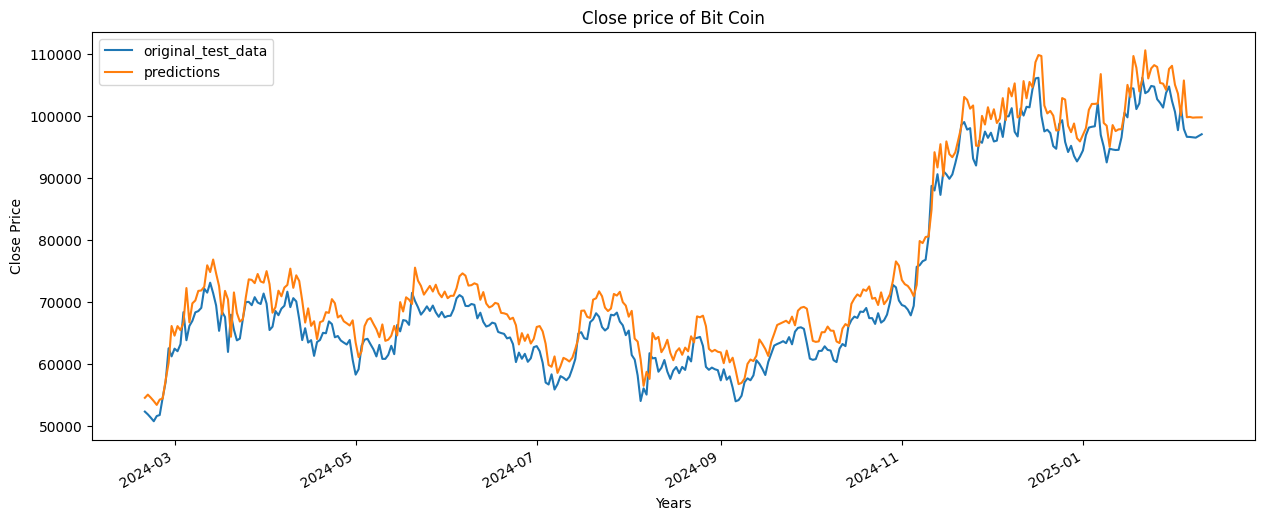

In [31]:
plt.figure()
plotting_data.plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [32]:
last_100 = Closing_price[['Close']].tail(100)
last_100.tail()

,Close
Date,
2025-02-05,96615.445312
2025-02-06,96593.296875
2025-02-07,96529.085938
2025-02-08,96482.453125
2025-02-10,97030.773438


In [33]:
last_100 = scaler.fit_transform(last_100['Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100

array([[[0.03854898],
        [0.02424978],
        [0.        ],
        [0.04038253],
        [0.2041899 ],
        [0.21112306],
        [0.2278342 ],
        [0.23392242],
        [0.3303185 ],
        [0.54493566],
        [0.52548407],
        [0.59404722],
        [0.50708347],
        [0.60661659],
        [0.59337713],
        [0.57478761],
        [0.59296404],
        [0.63994877],
        [0.69200866],
        [0.80066291],
        [0.81352167],
        [0.78168678],
        [0.78785714],
        [0.6597352 ],
        [0.63059776],
        [0.73434724],
        [0.72625895],
        [0.77344993],
        [0.74703868],
        [0.76870921],
        [0.73181099],
        [0.7353811 ],
        [0.80754452],
        [0.75080851],
        [0.83760026],
        [0.83766874],
        [0.87191128],
        [0.77269853],
        [0.7529439 ],
        [0.87026827],
        [0.84079029],
        [0.87773477],
        [0.87548384],
        [0.9518043 ],
        [0.99695976],
        [0

In [34]:
last_100.shape

(1, 100, 1)

In [35]:
day101 = model.predict(last_100)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.7962894]], dtype=float32)

In [36]:
scaler.inverse_transform(day101)

array([[98337.06]], dtype=float32)

In [37]:
# tmr day 101 ==> past 100
#     day 102 ==> day101 + past 99 days
#     day 103 ==> day 102 + + day 101 + past 98 days

In [38]:

def predict_future(no_of_days, prev_100):
    """
    Predicts future values for the specified number of days.

    Args:
        no_of_days (int): The number of days to predict into the future.
        prev_100 (numpy.ndarray): The previous 100 days' data.

    Returns:
        list: A list of predicted values for the future days.
    """

    future_predictions = []
    for i in range(no_of_days):
        # Convert prev_100 to a list to enable append
        prev_100_list = prev_100.tolist()
        next_day = model.predict(prev_100).tolist()

        # Append the prediction and remove the first element to maintain 100 days
        prev_100_list[0].append(next_day[0])
        prev_100_list = [prev_100_list[0][1:]]

        # Convert back to NumPy array with the original shape for the next prediction
        prev_100 = np.array(prev_100_list).reshape(1, -1, 1)

        future_predictions.append(scaler.inverse_transform(next_day))

    return future_predictions

In [39]:
#Now Call the function:
no_of_days = 10
# last_100 = last_100.tolist()
future_results = predict_future(no_of_days, last_100)
print(future_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[array([[98337.0685108]]), array([[99861.84774613]]), array([[101541.92679308]]), array([[103382.57241442]]), array([[105360.44405406]]), array([[107442.64329532]]), array([[109588.96451655]]), array([[111753.75710886]]), array([[113887.99105239]]), array([[115941.58525971]])]


Text(0.5, 1.0, 'Future Close price of Bit coin')

<Figure size 640x480 with 0 Axes>

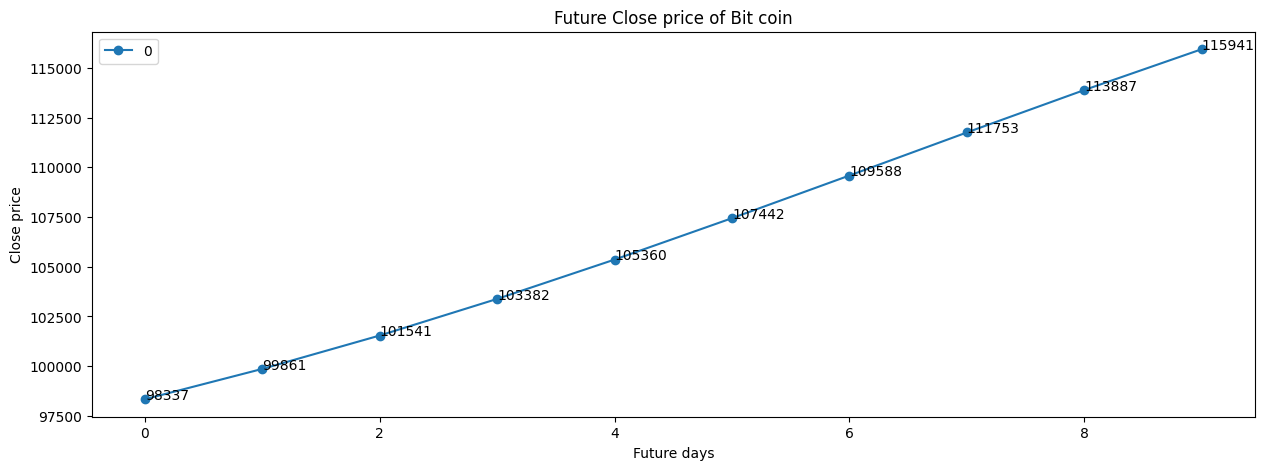

In [40]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i,future_results[i],int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close price')
plt.title("Future Close price of Bit coin")

In [41]:
model.save("coin_model.keras")

### 